**Object detection using Mask RCNN**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pre Processing and Imorting Libraries


In [ ]:
#Changing Folder Structure
import os
x = 0
for count, filename in enumerate(os.listdir("/content/drive/My Drive/crypt/object-detec-crypt/images/")): 
    firstname = filename
    filename = filename[:-4]
    x=x+1
    src ='/content/drive/My Drive/crypt/object-detec-crypt/images/'+ firstname 
    dst ='/content/drive/My Drive/crypt/object-detec-crypt/images/'+ str(x) + '.png'   
    src2 ='/content/drive/My Drive/crypt/object-detec-crypt/annotations/'+ filename + '.xml' 
    dst2 ='/content/drive/My Drive/crypt/object-detec-crypt/annotations/'+ str(x) + '.xml'    
    # rename() function will 
    # rename all the files 
    os.rename(src, dst) 
    os.rename(src2, dst2) 

In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
!pip uninstall keras

Uninstalling Keras-2.3.1:
  Would remove:
    /tensorflow-1.15.2/python3.6/Keras-2.3.1.dist-info/*
    /tensorflow-1.15.2/python3.6/docs/*
    /tensorflow-1.15.2/python3.6/keras/*
Proceed (y/n)? y
  Successfully uninstalled Keras-2.3.1


In [4]:
!pip install keras==2.1.2

     |████████████████████████████████| 307kB 8.5MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.1.2 which is incompatible.
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [5]:
!pip list | grep Keras


Keras                         2.1.2          
Keras-Applications            1.0.8          
Keras-Preprocessing           1.1.2          


In [6]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [7]:
!git clone https://github.com/matterport/Mask_RCNN.git
!cd Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 111.85 MiB | 21.95 MiB/s, done.
Resolving deltas: 100% (563/563), done.


In [8]:
import os
os.chdir('Mask_RCNN')

In [9]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mrcnn
copying mrcnn/config.py -> build/lib/mrcnn
copying mrcnn/model.py -> build/lib/mrcnn
copying mrcnn/parallel_model.py -> build/lib/mrcnn
copying mrcnn/__init__.py -> build/lib/mrcnn
copying mrcnn/utils.py -> build/lib/mrcnn
copying mrcnn/visualize.py -> build/lib/mrcnn
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/config.py -> build/bdist.linux-x86_64/egg/mrcn

In [10]:
!wget --quiet https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5
!ls -lh mask_rcnn_coco.h5

-rw-r--r-- 1 root root 246M Nov 26  2017 mask_rcnn_coco.h5


In [11]:
from os import listdir
from xml.etree import ElementTree

In [12]:
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import mrcnn
from mrcnn.utils import Dataset
from mrcnn.model import MaskRCNN
import numpy as np
from numpy import zeros
from numpy import asarray
import colorsys
import argparse
import imutils
import random
import cv2
import os
import time
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from keras.models import load_model
%matplotlib inline

Using TensorFlow backend.


# Mask RCNN






In [13]:
class myMaskRCNNConfig(Config):
    # give the configuration a recognizable name
    NAME = "Crypt Detection"
 
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
 
    # number of classes (we would normally add +1 for the background)
     # Crypt + BG
    NUM_CLASSES = 1+1
   
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 131
    
    # Learning rate
    LEARNING_RATE=0.006
    
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9
    
    # setting Max ground truth instances
    MAX_GT_INSTANCES=10

In [14]:
config= myMaskRCNNConfig()

In [ ]:
#config_infer = myMaskRCNNConfig()

In [15]:
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.006
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [16]:
# initialize the Mask R-CNN model for inference 
print("Loading Mask R-CNN model...")
model = modellib.MaskRCNN(mode="training", config=config, model_dir='./')

Loading Mask R-CNN model...





Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


In [17]:
model.keras_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

# Importing Data


In [18]:

class Cryptdataset(Dataset):
    # load the dataset definitions
    def load_dataset(self, dataset_dir, is_train=True):
        
        # Add classes. We have only one class to add.
        self.add_class("dataset", 1, "crypt")
        
        # define data locations for images and annotations
        images_dir = dataset_dir + '/images/'
        annotations_dir = dataset_dir + '/annotations/'
        n = 0
        
        # Iterate through all files in the folder to 
        #add class, images and annotaions
        for filename in listdir(images_dir):
            
            # extract image id
            image_id = filename[:-4]
            n=n+1
            
           
            # skip all images after 80 if we are building the train set
            if is_train and int(n) >= 58:
                continue
            # skip all images before 80 if we are building the test/val set
            if not is_train and int(n) < 51:
                continue
            
            # setting image file
            img_path = images_dir + filename
            
            # setting annotations file
            ann_path = annotations_dir + image_id + '.xml'
            
            # adding images and annotations to dataset
            self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
    def extract_boxes(self, filename):
        
        # load and parse the file
        tree = ElementTree.parse(filename)
        # get the root of the document
        root = tree.getroot()
        # extract each bounding box
        boxes = list()
        for box in root.findall('.//bndbox'):
            xmin = int(box.find('xmin').text)
            ymin = int(box.find('ymin').text)
            xmax = int(box.find('xmax').text)
            ymax = int(box.find('ymax').text)
            coors = [xmin, ymin, xmax, ymax]
            boxes.append(coors)
        
        # extract image dimensions
        width = int(root.find('.//size/width').text)
        height = int(root.find('.//size/height').text)
        return boxes, width, height

    # load the masks for an image
    """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
     """
    def load_mask(self, image_id):
        # get details of image
        info = self.image_info[image_id]
        
        # define anntation  file location
        path = info['annotation']
        
        # load XML
        boxes, w, h = self.extract_boxes(path)
       
        # create one array for all masks, each on a different channel
        masks = zeros([h, w, len(boxes)], dtype='uint8')
        
        # create masks
        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            masks[row_s:row_e, col_s:col_e, i] = 1
            class_ids.append(self.class_names.index('crypt'))
        return masks, asarray(class_ids, dtype='int32')

    # load an image reference
    #Return the path of the image."""
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        print(info)
        return info['path']

In [19]:
from os import listdir

In [ ]:
!pip install imgaug

In [ ]:
import imgaug.augmenters as iaa
augmentation = iaa.Sometimes(0.9, [
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5)
])

In [20]:

# prepare train set
train_set = Cryptdataset()
train_set.load_dataset('/content/drive/My Drive/crypt/object-detec-crypt', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))
# prepare test/val set
test_set = Cryptdataset()
test_set.load_dataset('/content/drive/My Drive/crypt/object-detec-crypt', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

Train: 57
Test: 9


In [ ]:
#! rm -rf "/content/Mask_RCNN/crypt detection20200911T1745"

In [21]:
#load the weights for COCO
model.load_weights('/content/Mask_RCNN/mask_rcnn_coco.h5', 
                   by_name=True, 
                   exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])

In [ ]:
#model = modellib.MaskRCNN(mode="training", config=config, model_dir='./')
model.load_weights("/content/drive/My Drive/crypt/model-weights/crypt-v6.h5", by_name=True)


# Mask RCNN Training


In [22]:
## train heads with higher lr to speedup the learning
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE,custom_callbacks = [tensorboard_callback], epochs=40, layers='heads')
history = model.keras_model.history.history


Starting at epoch 0. LR=0.006

Checkpoint Path: ./crypt detection20200913T0807/mask_rcnn_crypt detection_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4   

/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor



/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2023: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'




Epoch 1/40
130/131 [============================>.] - ETA: 0s - loss: 2.0580 - rpn_class_loss: 0.0694 - rpn_bbox_loss: 0.5553 - mrcnn_class_loss: 0.3005 - mrcnn_bbox_loss: 0.6928 - mrcnn_mask_loss: 0.4399

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2251: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'



131/131 [==============================] - 166s 1s/step - loss: 2.0560 - rpn_class_loss: 0.0690 - rpn_bbox_loss: 0.5557 - mrcnn_class_loss: 0.2997 - mrcnn_bbox_loss: 0.6906 - mrcnn_mask_loss: 0.4410 - val_loss: 1.6961 - val_rpn_class_loss: 0.0309 - val_rpn_bbox_loss: 0.6406 - val_mrcnn_class_loss: 0.1505 - val_mrcnn_bbox_loss: 0.5023 - val_mrcnn_mask_loss: 0.3719
Epoch 2/40
131/131 [==============================] - 94s 714ms/step - loss: 1.4148 - rpn_class_loss: 0.0408 - rpn_bbox_loss: 0.4493 - mrcnn_class_loss: 0.2140 - mrcnn_bbox_loss: 0.3800 - mrcnn_mask_loss: 0.3308 - val_loss: 1.2430 - val_rpn_class_loss: 0.0305 - val_rpn_bbox_loss: 0.3930 - val_mrcnn_class_loss: 0.2029 - val_mrcnn_bbox_loss: 0.2866 - val_mrcnn_mask_loss: 0.3300
Epoch 3/40
131/131 [==============================] - 94s 720ms/step - loss: 1.3188 - rpn_class_loss: 0.0395 - rpn_bbox_loss: 0.5248 - mrcnn_class_loss: 0.1665 - mrcnn_bbox_loss: 0.2909 - mrcnn_mask_loss: 0.2970 - val_loss: 1.1379 - val_rpn_class_loss: 0

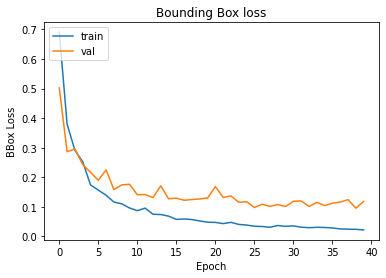

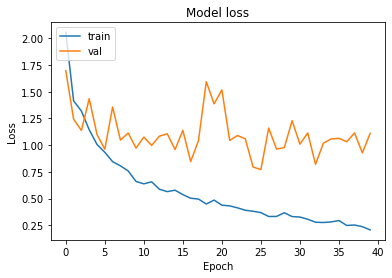

In [32]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history['mrcnn_bbox_loss'])
plt.plot(history['val_mrcnn_bbox_loss'])
plt.title('Bounding Box loss')
plt.ylabel('BBox Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [33]:
model.keras_model.save_weights("/content/drive/My Drive/crypt/model-weights/crypt-v420-objectnew.h5")

In [35]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# #Loading the model in the inference mode
# model = modellib.MaskRCNN(mode="inference", config=config, model_dir='./')
# # loading the trained weights o the custom dataset
# model.load_weights("/content/drive/My Drive/crypt/model-weights/crypt-v3.h5", by_name=True)
# img = load_img("/content/drive/My Drive/crypt/object-detec-crypt/images/1.png")
# img = img_to_array(img)
# # detecting objects in the image
# result= model.detect([img])

In [38]:
model = modellib.MaskRCNN(mode="inference", config=config, model_dir='./')
model.load_weights("/content/drive/My Drive/crypt/model-weights/crypt-v420-objectnew.h5", by_name=True)




Instructions for updating:
Use `tf.cast` instead.


# Results

In [39]:
img = load_img("/content/drive/My Drive/crypt/object-detec-crypt/images/24.png")
img = img_to_array(img)
result= model.detect([img])

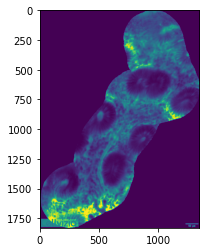

In [59]:
plt.imshow(img[:,:,1])

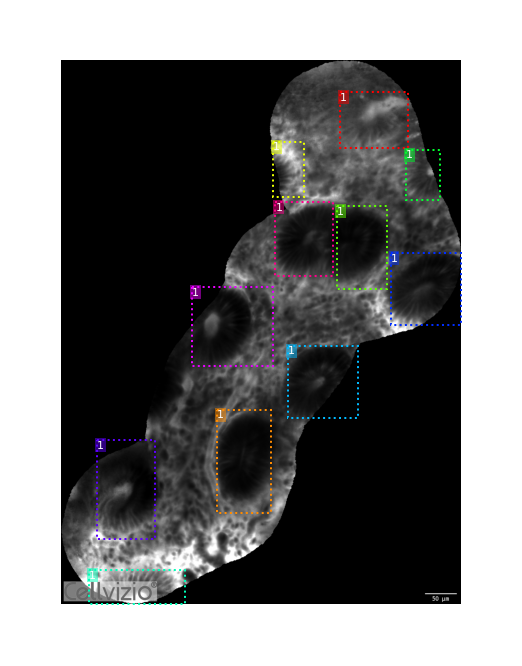

In [61]:
r=result[0]
visualize.draw_boxes(img, boxes=r['rois'], captions=r['class_ids'])

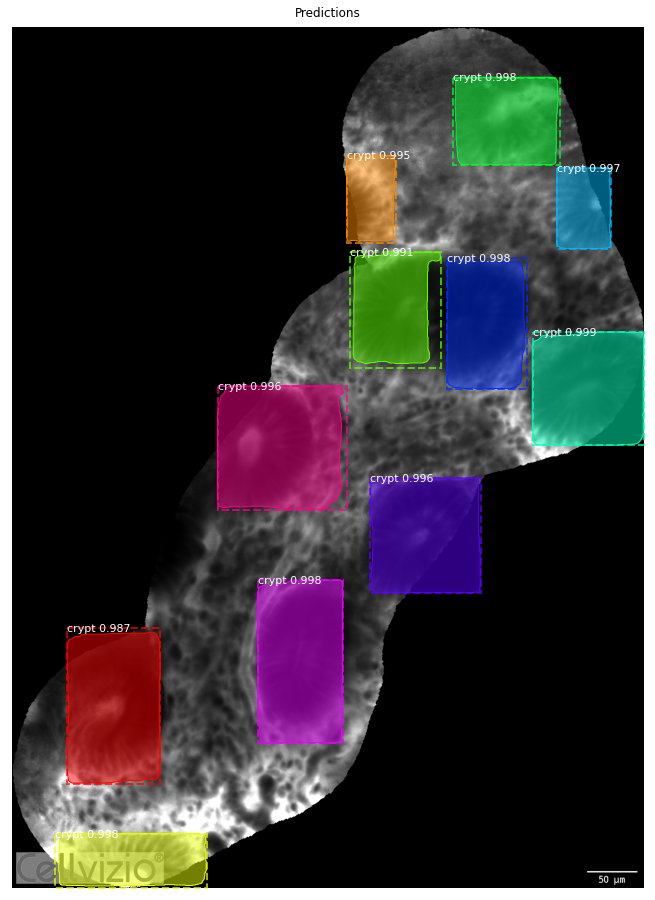

In [40]:
r=result[0]
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                            test_set.class_names, r['scores'], 
                            title="Predictions")

In [ ]:
r=result[0]
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                            test_set.class_names, r['scores'], 
                            title="Predictions")

{'id': '55', 'source': 'dataset', 'path': '/content/drive/My Drive/crypt/object-detec-crypt/images/55.png', 'annotation': '/content/drive/My Drive/crypt/object-detec-crypt/annotations/55.xml'}
image ID: dataset.55 (4) /content/drive/My Drive/crypt/object-detec-crypt/images/55.png
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


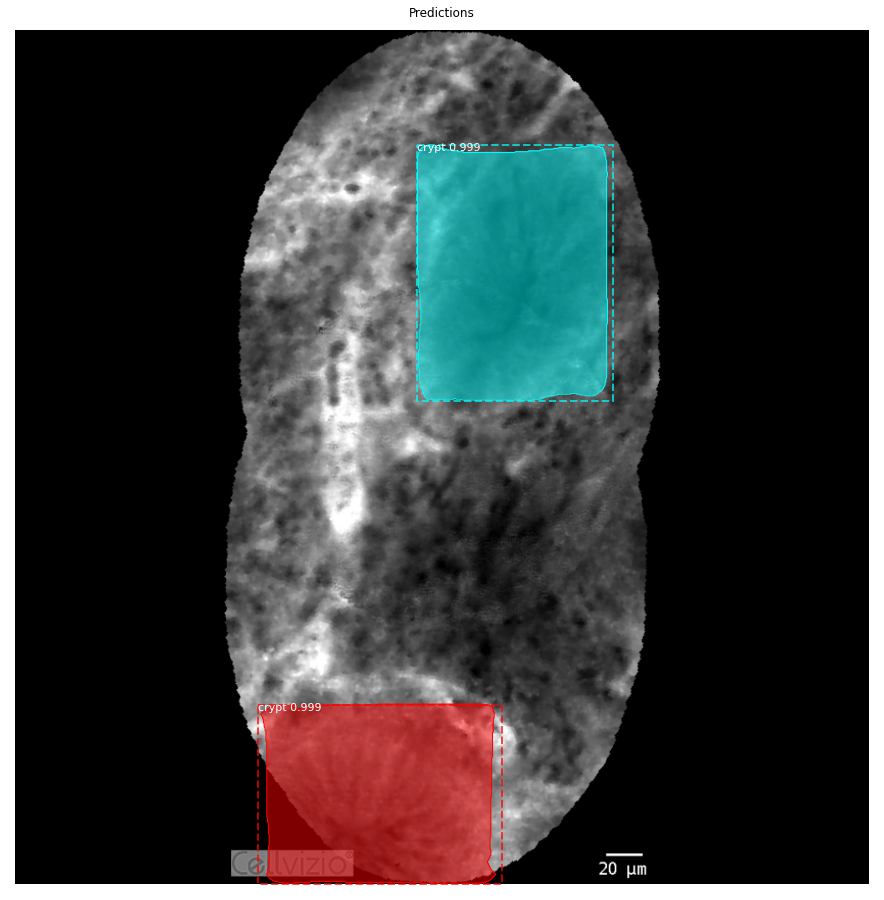

In [64]:
image_id = 4
image, image_meta, gt_class_id, gt_bbox, gt_mask =    modellib.load_image_gt(test_set, config, image_id, use_mini_mask=False)
info = test_set.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       test_set.image_reference(image_id)))
# Run object detection
results = model.detect([image], verbose=1)
# Display results

r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            test_set.class_names, r['scores'], 
                            title="Predictions")